![](figs/se_02.png)
# Workshop Instructions
***
- <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> Follow along by typing the code yourself - this helps with learning!
- <img src="figs/icons/code.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(2000%) hue-rotate(40deg) brightness(915%) contrast(100%);"/> Code cells marked as "Exercise" are for you to complete
- <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(1500%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> Look for hints if you get stuck
- <img src="figs/icons/success.svg" width="20" style="filter: invert(56%) sepia(71%) saturate(5293%) hue-rotate(117deg) brightness(95%) contrast(101%);"/> Compare your solution with the provided answers
- <img src="figs/icons/list.svg" width="20" style="filter: invert(19%) sepia(75%) saturate(6158%) hue-rotate(312deg) brightness(87%) contrast(116%);"/> Don't worry if you make mistakes - debugging is part of learning!


In [13]:
from pathlib import Path
import sys

helper_utils = Path(Path.cwd(), 'utils')

if str(helper_utils) not in sys.path:
    sys.path.append(str(helper_utils))

import utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

checker = utils.core.ExerciseChecker("SE02")

# 1. Artificial Neural Networks
***
Artificial Neural Networks (ANNs) are a class of machine learning models inspired by the structure and function of the human brain. They consist of interconnected nodes (neurons) organized in layers, which process and learn from data. ANNs are the foundation of deep learning. 

In their simplest form, ANNs consist of an input layer, one or more hidden layers, and an output layer. Each neuron in a layer is connected to neurons in the next layer through weighted connections. The weights are adjusted during training to minimize the difference between the predicted and actual outputs.


<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\ann.png" alt="Artificial Neural Networks" align="center" style="width: 40%; height: auto; margin: 0 auto;">
</figure>

## Neurons
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Neurons are the basic building blocks of ANNs, similar to biological neurons. Each neuron receives inputs, applies a transformation, and produces an output.

The basic shape of a neuron can be seen in the following figure:

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\non_linenar_neuron.png" alt="Single Neuron" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

The output of the neuron after applying the activation function can be expressed as:
$$ \hat{y} = f(W \cdot X + b)$$

Where:
- $ \hat{y} $ is the output of the neuron after applying the activation function. We use the hat symbol to denote that this is the predicted output of the neuron. As we will see later, the predicted output of the neuron is not necessarily equal to the actual output of the neuron. The difference between the two is called the **error**.
- $ f $ is the activation function, which introduces non-linearity to the output of the neuron. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit).
- $ W $ is the weight vector, which determines the strength of the connections between the inputs and the neuron.
- $ X $ is the input vector, which represents the features of the data.
- $ b $ is the bias term, which allows the neuron to shift the activation function to better fit the data.
- $ \cdot $ represents the dot product between the weight vector and the input vector.

> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Weights and biases are learnable parameters of a neural network. Weights determine the strength of connections between neurons, while biases allow the neuron to shift the activation function.

### Features and Targets
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: In machine learning, we refer to inputs as features and outputs as targets.

In the context of neural networks:

- **Features (X)**: The input variables or attributes that are used by the model to make predictions. Features represent the information we have available.
- **Targets (y)**: The values we're trying to predict or the ground truth labels. These are what the model is trained to approximate.

Let's implement our neuron in python using PyTorch. We will create a class called `Neuron` that takes the input vector (features), weight vector, and bias term as arguments. The class will have a method called `forward` that computes the output of the neuron (predicted target).

This is the first step in the training process, passing the inputs to the neuron and getting the output, and we will call this the *forward pass*.

In order to implement the neuron, we will be using PyTorch's `torch.nn.Module` class, which is a base class for all neural network modules in PyTorch. This class provides a convenient way to define and manage the parameters of the model, as well as the forward pass. We will also use the `torch.nn.Parameter` class to define the weights and biases of the neuron, which allows us to easily update them during training.

> <img src="figs/icons/code.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(2000%) hue-rotate(40deg) brightness(915%) contrast(100%);"/> **Snippet 1**: nn.Module and nn.Parameter
```python
weight = torch.nn.Parameter(torch.randn(2, 1), requires_grad=True)
bias = torch.nn.Parameter(torch.randn(1))

```


In [14]:
# Exercise 1: Implementing a Neuron 🎯
# Implement:
# 1. The sigmoid function
# 2. A neuron using torch.nn.Module but with manual parameter handling
# 3. Create a neuron with specified input features and initialize weights
# 4. Define an input vector x with two features
# 5. Use the neuron to compute an output

def sigmoid(x:torch.Tensor) -> torch.Tensor:
    # The sigmoid function is defined as:
    # sigmoid(x) = 1 / (1 + exp(-x))
    return 1 / (1 + torch.exp(-x)) # Your code here

class Perceptron(torch.nn.Module):
    def __init__(self, n_features:int, activation:callable=sigmoid) -> None:
        # Initialize the neuron as a PyTorch module
        super().__init__()
        # Initialize weights with random values - Parameter makes it learnable
        self.weights = torch.nn.Parameter(torch.randn(n_features)) # Your code here
        
        # Initialize bias to a random value
        self.bias = torch.nn.Parameter(torch.randn(1)) # Your code here
        
        self.activation = activation # Your code here

        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        # 1. Compute linear output manually (dot product of inputs and weights + bias)
        # 2. Apply the activation function to the result
        # 3. Return the output
        
        linear_output = torch.dot(x, self.weights) + self.bias # Your code here
        
        output = self.activation(linear_output) # Your code here
        
        return output
    
    def __repr__(self) -> str:
        """String representation of the neuron"""
        return f"Neuron (weights = {self.weights.detach()}, bias = {self.bias.detach()})"

# Create a neuron with 2 input features
neuron = Perceptron(n_features=2)

# Define an input vector x with two features
# with values 1.0, 2.0
x = torch.tensor([1.0, 2.0]) # Your code here

# Let's use our neuron to compute an output
output = neuron(x)  # In PyTorch modules, we call the object directly instead of .forward()

# Print the output to see the result
print(f"Output from neuron: {output.item()}")
print(neuron)
print(f"Neuron has {len(neuron.weights)} weights")

# ✅ Check your answer
answer = {
    'sigmoid': sigmoid,
    'neuron_output': output,
    'neuron_input_size': len(neuron.weights),
    'has_bias': hasattr(neuron, 'bias'),
    'is_parameterized': isinstance(neuron.weights, torch.nn.Parameter)
}
checker.check_exercise(1, answer)

Output from neuron: 0.7028616070747375
Neuron (weights = tensor([0.6021, 0.4642]), bias = tensor([-0.6695]))
Neuron has 2 weights
✅ sigmoid is correct!
✅ neuron_input_size is correct!
✅ has_bias is correct!
✅ is_parameterized is correct!

🎉 Excellent! All parts are correct!


Perceptron Architecture:
  - Input features: 2
  - Activation function: sigmoid
  - Output: 1 (probability between 0 and 1)

Graph Properties:
  - Number of nodes: 4
  - Number of edges: 3


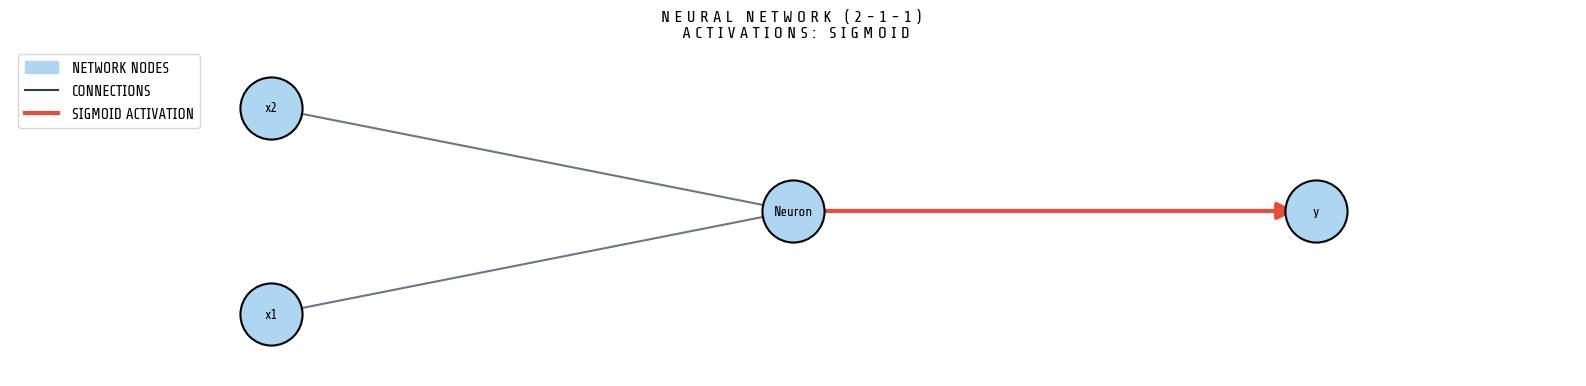

In [15]:
fig, ax, G, pos = utils.plotting.visualize_network_nx(neuron, figsize=(16, 4))

# Display information about the perceptron
print(f"Perceptron Architecture:")
print(f"  - Input features: {len(neuron.weights)}")
print(f"  - Activation function: {neuron.activation.__name__ if hasattr(neuron.activation, '__name__') else 'Custom'}")
print(f"  - Output: 1 (probability between 0 and 1)")
print(f"\nGraph Properties:")
print(f"  - Number of nodes: {G.number_of_nodes()}")
print(f"  - Number of edges: {G.number_of_edges()}")

# 2. Using neurons to solve problems
***

<figure style="background-color: white; border-radius: 10px; padding: 20px; margin: 0 0 0 auto; float: right; display: inline-block; width: 40%;">
    <img src="figs\challenger.png" alt="Challenger O-rings" style="width: 100%; height: auto;">
</figure>

Rocket engineering is an area that requires the outermost precision. Small mistakes can lead to catastrophic results. The explosion of the USA Space Shuttle Challenger on 28th January, 1986 was the result of the failure of one of the O-rings sealing the propulsion system. It turned out that some components of the shuttle hadn’t been properly tested at different temperatures. The night before there were discussions about the safety of the launch.

For this section we are going to have a look at the data from the Challenger disaster. The data contains information about the temperature at which the shuttle was launched and whether or not the O-rings failed. Let's load the data and take a look at it.

| Variable | Description |
|----------|-------------|
| `n_risky` | Number of O-rings at risk during launch |
| `n_distressed` | Number of O-rings experiencing thermal distress |
| `temp` | Temperature at launch (in degrees Fahrenheit) |
| `leak_psi` | Pressure at which the O-rings leak |
| `temporal_order` | Temporal order of the launch |


In [16]:
data_path = Path(Path.cwd(), 'datasets')
dataset_path = utils.data.download_dataset('challenger',
                                           dest_path=data_path,
                                           extract=True)
dataset_path = dataset_path / 'o-ring-erosion-only.data'

Downloading:
Challenger USA Space Shuttle O-Ring dataset for predicting the failure of O-rings
> Authors: Draper, D. 
> Year: 1993
> Website: https://archive.ics.uci.edu/dataset/92/challenger+usa+space+shuttle+o+ring

File already exists


Extracting challenger+usa+space+shuttle+o+ring.zip: 100%|██████████| 4/4 [00:00<00:00, 320.67it/s]


In [17]:
cols = ['n_risky', 'n_distressed', 'temp', 'leak_psi', 'temporal_order']

df = pd.read_csv(dataset_path, sep="\\s+", header=None, names=cols)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_risky,23.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
n_distressed,23.0,0.304348,0.558796,0.0,0.0,0.0,0.5,2.0
temp,23.0,69.565217,7.057080,53.0,67.0,70.0,75.0,81.0
leak_psi,23.0,152.173913,68.221332,50.0,75.0,200.0,200.0,200.0
temporal_order,23.0,12.000000,6.782330,1.0,6.5,12.0,17.5,23.0


## Preparing the data
***
We are interested in creating a model that predicts if the launch will be successful or not based on the temperature at which the shuttle is launched. We will use the `n_distressed` variable as the target variable and the `temp` variable as the feature. 

There are four pre-processing steps we need to do before we can start training our model:
1. Change the temperature from Fahrenheit to Celsius
2. Normalize the temperature to be between 0 and 1
3. Clip the number of distressed O-rings to be between 0 and 1
4. Split the data into training and test sets

Data shape: torch.Size([23, 1]) inputs and torch.Size([23, 1]) targets
Temperature mean: -6.18°C, std: 2.18°C
Number of O-ring distress cases: 6.0 out of 23
✅ f_to_c is correct!
✅ X_shape is correct!
✅ y_shape is correct!
❌ X_mean has incorrect value. Expected 20.8696, got -6.1836
💡 Hint: Normalize using the formula: (X - X_mean) / X_std
❌ X_std has incorrect value. Expected 3.9206, got 2.1781
💡 Hint: The Fahrenheit to Celsius conversion formula is: C = (F - 32) * 5 / 9
✅ n_distress_cases is correct!


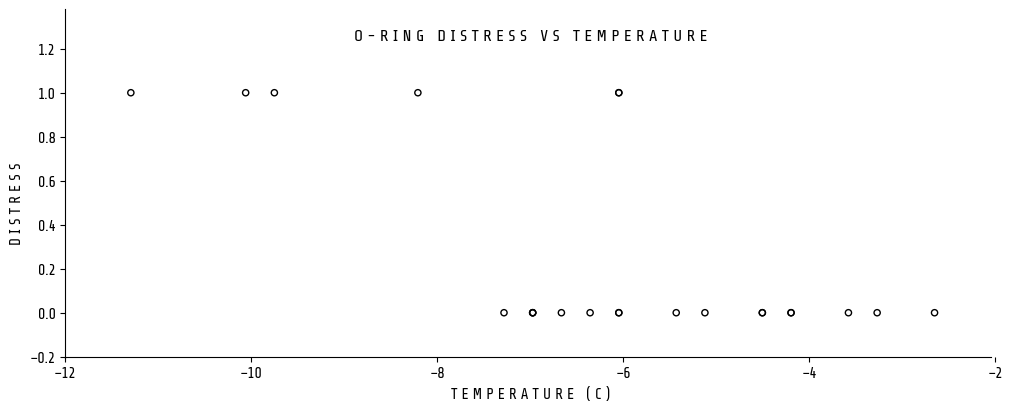

In [26]:
# Exercise 2: Data Preparation 🎯
# Implement:
# 1. Convert temperature from Fahrenheit to Celsius
# 2. Cap n_distressed values at 1.0 (binary outcome)
# 3. Convert features and targets to PyTorch tensors
# 4. Normalize the temperature data

# Step 1: Convert temperature from Fahrenheit to Celsius
def f_to_c(f:float) -> float:
    # The conversion formula is:
    # C = (F - 32) * 5 / 9
    return (f - 32) * 5 / 9 # Your code here

# Apply the conversion function to the temperature column
df.temp = df.temp.apply(f_to_c) # Your code here

# Step 2: Cap the n_distressed at 1.0 (binary outcome)
df.n_distressed = df.n_distressed.clip(upper=1.0) # Your code here

# Step 3: Convert features and targets to PyTorch tensors
X = torch.tensor(df.temp.values).float().view(-1, 1)  # Your code here
y = torch.tensor(df.n_distressed.values).float().view(-1, 1)  # Your code here

# Step 4: Normalize the temperature data for better training
# Use Standardization (z-score normalization)
X_mean = X.mean() # Your code here
X_std = X.std()  # Your code here
X_normalized = (X - X_mean) / X_std # Your code here

print(f"Data shape: {X_normalized.shape} inputs and {y.shape} targets")
print(f"Temperature mean: {X_mean.item():.2f}°C, std: {X_std.item():.2f}°C")
print(f"Number of O-ring distress cases: {y.sum().item()} out of {len(y)}")


# ✅ Check your answer
answer = {
    'f_to_c': f_to_c,
    'X_shape': X_normalized.shape,
    'y_shape': y.shape,
    'X_mean': X_mean.item(),
    'X_std': X_std.item(),
    'n_distress_cases': y.sum().item()
}

checker.check_exercise(2, answer)

# Plot the data to visualize the relationship
ax = df.plot.scatter(x='temp', y='n_distressed', figsize=(12, 4), edgecolors='black', c='None')
utils.plotting.make_fig_pretty(ax, title="O-Ring Distress vs Temperature",
                             xlabel="Temperature (C)", ylabel="Distress")

## The Forward Pass
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: The forward pass is the process of feeding input data through the neural network to get predictions.

The forward pass is the first step in the training process of a neural network. During the forward pass:

1. **Input data (features)** is fed into the network
2. Each **layer processes** the inputs it receives
3. The **activation functions** add non-linearity
4. The final layer produces **output predictions (predicted targets)**

For our single neuron model working with the Challenger O-ring data, the forward pass will:

- Take temperature as input feature
- Apply the weights and bias
- Pass the result through the sigmoid activation function
- Output a prediction between 0 and 1 representing the probability of O-ring distress (predicted target)

Mathematically, for a single input feature (temperature), this is expressed as:

$$\hat{y} = \sigma(w \cdot \text{temperature} + b)$$

Where:
- $\hat{y}$ is the predicted probability of O-ring distress (predicted target)
- $w$ is the weight parameter
- $b$ is the bias parameter
- $\sigma$ is the sigmoid activation function

We'll now prepare the Challenger data for use with our neuron. We'll normalize the temperature data to help with training, and then implement the loss function that will measure how well our neuron is predicting O-ring distress.

## Loss Functions and Error Measurement
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: A loss function measures how far the predicted output of a model is from the actual target value.

The output of the neuron is not necessarily equal to the actual output of the neuron. The difference between the two is called the error. The error can be calculated using a loss function, which quantifies how well the model is performing.


### Why Do We Need to Measure Error?

When training neural networks, we need a way to quantify how well our model is performing. Loss functions provide a numerical measure of the error between the predicted values (outputs of our network) and the actual target values. The goal of training is to minimize this error.

Key reasons for measuring error:
1. **Optimization guidance**: The loss function guides the optimization process by indicating which direction to adjust weights and biases
2. **Performance evaluation**: Loss values help us track the model's performance during training
3. **Comparison**: Different models can be compared objectively using loss metrics
4. **Convergence detection**: A stable or increasing loss can indicate when training should stop


In [19]:
# Exercise 3: Implementing a Loss Function 🎯
# In this exercise, you will:
# 1. Implement a Mean Squared Error (MSE) loss function
# 2. Create a modified neuron for the O-ring data
# 3. Compute predictions using the forward pass
# 4. Calculate the loss between predictions and actual targets

def mse_loss(predictions: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
    """Mean Squared Error loss function
    
    MSE = 1/n * Σ (predictions - targets)²
    where n is the number of samples.
    """
    # Calculate the squared difference between predictions and targets
    squared_diff = (predictions - targets) ** 2 # Your code here
    
    # Return the mean of the squared differences
    return squared_diff.mean() # Your code here

# Create a neuron specifically for the temperature data (1 input feature)
model = Perceptron(n_features=1) # Your code here
print(f"Initial model: {model}")

# Forward pass: Feed the normalized temperature data through the neuron
predictions = torch.zeros_like(y)

# Your code here
for i in range(len(X_normalized)): 
    predictions[i] = model(X_normalized[i])

# Calculate the loss using our MSE loss function
loss = mse_loss(predictions, y)
print(f"Initial loss: {loss.item():.4f}")

# Alternatively, we can use PyTorch's built-in MSE loss function
pytorch_mse = torch.nn.MSELoss()
loss_pytorch = pytorch_mse(predictions, y)
print(f"PyTorch MSE loss: {loss_pytorch.item():.4f}")

# Check if our implementation matches PyTorch's (should be very close)
loss_function_correct = torch.isclose(loss, loss_pytorch, rtol=1e-4)
print(f"Our MSE implementation matches PyTorch: {loss_function_correct}")

# ✅ Check your answer
answer = {
    'mse_loss': mse_loss,
}
checker.check_exercise(3, answer)

Initial model: Neuron (weights = tensor([-1.2265]), bias = tensor([-0.1660]))
Initial loss: 0.1516
PyTorch MSE loss: 0.1516
Our MSE implementation matches PyTorch: True
✅ mse_loss is correct!

🎉 Excellent! All parts are correct!


## Understanding Features, Targets, and Batching
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Features are the input variables used to make predictions, while targets are the values we're trying to predict.

In our O-ring example:
- **Feature**: Temperature (X_normalized) - this is what our model uses to make predictions
- **Target**: O-ring distress (y) - this is what we're trying to predict

The relationship between features and targets is at the core of supervised learning. Neural networks learn to map from features to targets by adjusting their internal parameters (weights and biases) based on examples.

In more complex scenarios:
- Features could be multiple variables (e.g., temperature, pressure, humidity)
- Targets could be categorical (classification) or continuous (regression) values
- The mapping function between features and targets can be highly non-linear

### Batch Processing vs. Individual Samples

In production machine learning, we typically process data in batches (groups of samples) for efficiency. However, in our implementation above, we're processing one sample at a time in our loops:

```python
for i in range(len(X_normalized)): 
    predictions[i] = model(X_normalized[i])
```

We're doing this because:
1. We have a small dataset (only 23 samples)
2. We have just one feature (temperature)
3. It makes the learning process more transparent

In a more advanced implementation with PyTorch, we would use tensor operations to process all samples at once:

```python
# Process all samples in a single operation
predictions = model(X_normalized)  # If model supports batch processing
```

This vectorized approach would be more efficient, especially for larger datasets with multiple features. As we progress to more complex models, batching will become increasingly important for both computational efficiency and implementing techniques like mini-batch gradient descent.

## The Backward Pass (Backpropagation)
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: The backward pass is the process of computing gradients of the loss with respect to the network parameters, which are used to update those parameters.

After computing the loss in the forward pass, we need to adjust our model's parameters (weights and bias) to improve its predictions. This is done through **backpropagation**, which calculates how much each parameter contributed to the error.

The backpropagation algorithm works by:

1. **Computing gradients**: Calculate how the loss changes with respect to each parameter
2. **Propagating error backward**: Work from the output layer back to the input layer
3. **Applying the chain rule**: Break down complex derivatives into simpler parts

### Gradient Descent Update Rule

Once we have the gradients, we update the parameters using the gradient descent rule:

$$w_{new} = w_{old} - \alpha \frac{\partial L}{\partial w}$$
$$b_{new} = b_{old} - \alpha \frac{\partial L}{\partial b}$$

Where:
- $\alpha$ is the learning rate, controlling how big of a step we take
- $\frac{\partial L}{\partial w}$ is the gradient of the loss with respect to the weight
- $\frac{\partial L}{\partial b}$ is the gradient of the loss with respect to the bias

### PyTorch's Autograd

PyTorch provides automatic differentiation through its `autograd` feature, which greatly simplifies the backpropagation process. With autograd:

1. We set `requires_grad=True` for tensors we want to compute gradients for
2. We perform the forward pass and compute the loss
3. We call `loss.backward()` to compute all gradients automatically
4. Gradients are stored in the `.grad` attribute of each parameter

### Training Neural Networks

Training a neural network involves iteratively adjusting its parameters (weights and biases) to minimize the loss function. This process typically consists of several steps repeated over many epochs:

1. **Forward pass**: Compute the network's predictions given the current parameters
2. **Loss calculation**: Measure the error between predictions and true values
3. **Backward pass**: Compute the gradients of the loss with respect to parameters
4. **Parameter update**: Adjust parameters in the direction that reduces loss


### Understanding PyTorch's Autograd for Backpropagation

> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Important**: PyTorch uses autograd to automatically compute gradients, which is essential for training neural networks.

When we set `requires_grad=True` on tensors (which happens automatically for `nn.Parameter`), PyTorch:

1. **Tracks operations**: Records all operations performed on these tensors in a computational graph
2. **Accumulates gradients**: When we call `loss.backward()`, gradients are computed for all tracked tensors
3. **Stores gradients**: The computed gradients are stored in the `.grad` attribute of each tensor

For our neuron model:
- `model.weights.requires_grad` is `True`, so gradients are computed for weights
- `model.bias.requires_grad` is `True`, so gradients are computed for bias
- After `loss.backward()`, `model.weights.grad` and `model.bias.grad` contain the gradients

In the next exercise, we'll use these gradients to update our model parameters via gradient descent.

Let's implement the backward pass and parameter update for our O-ring prediction model.

In [20]:
# Exercise 4: Implementing the Backward Pass and Parameter Updates 🎯
# In this exercise, you will:
# 1. Implement a training loop with forward and backward passes
# 2. Use PyTorch's autograd to compute gradients
# 3. Update the model parameters using gradient descent
# 4. Visualize how the model's predictions improve over time

# Reset our model for training
model = Perceptron(n_features=1)
print(f"Initial model parameters: {model}")

# Define training hyperparameters
learning_rate = 0.1
num_epochs = 1000

# Lists to store training progress
train_losses = []

# Training loop
for epoch in range(num_epochs):
    # Forward pass: compute predictions
    predictions = torch.zeros_like(y)
    for i in range(len(X_normalized)):
        predictions[i] = model(X_normalized[i])
    
    # Compute loss
    loss = mse_loss(predictions, y)
    train_losses.append(loss.item())
    
    # Backward pass: compute gradients
    loss.backward()
    
    # Update parameters using gradient descent
    with torch.no_grad():  # No need to track gradients during the update
        model.weights -= learning_rate * model.weights.grad
        model.bias -= learning_rate * model.bias.grad
    
    # Zero gradients for the next iteration
    model.weights.grad.zero_()
    model.bias.grad.zero_()
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

print(f"Final model parameters: {model}")
print(f"Final loss: {train_losses[-1]:.4f}")

# Calculate final predictions
with torch.no_grad():
    final_predictions = torch.zeros_like(y)
    for i in range(len(X_normalized)):
        final_predictions[i] = model(X_normalized[i])

# ✅ Check your answer - is the loss decreasing over time?
answer = {
    'training_convergence': train_losses[0] > train_losses[-1],
    'final_loss': train_losses[-1],
    'negative_weight': model.weights.item() < 0
}
checker.check_exercise(4, answer)

Initial model parameters: Neuron (weights = tensor([-1.7911]), bias = tensor([-0.8391]))
Epoch 10/1000, Loss: 0.1095
Epoch 20/1000, Loss: 0.1082
Epoch 30/1000, Loss: 0.1070
Epoch 40/1000, Loss: 0.1060
Epoch 50/1000, Loss: 0.1051
Epoch 60/1000, Loss: 0.1043
Epoch 70/1000, Loss: 0.1036
Epoch 80/1000, Loss: 0.1030
Epoch 90/1000, Loss: 0.1025
Epoch 100/1000, Loss: 0.1020
Epoch 110/1000, Loss: 0.1016
Epoch 120/1000, Loss: 0.1013
Epoch 130/1000, Loss: 0.1009
Epoch 140/1000, Loss: 0.1006
Epoch 150/1000, Loss: 0.1004
Epoch 160/1000, Loss: 0.1001
Epoch 170/1000, Loss: 0.0999
Epoch 180/1000, Loss: 0.0997
Epoch 190/1000, Loss: 0.0996
Epoch 200/1000, Loss: 0.0994
Epoch 210/1000, Loss: 0.0993
Epoch 220/1000, Loss: 0.0991
Epoch 230/1000, Loss: 0.0990
Epoch 240/1000, Loss: 0.0989
Epoch 250/1000, Loss: 0.0988
Epoch 260/1000, Loss: 0.0987
Epoch 270/1000, Loss: 0.0986
Epoch 280/1000, Loss: 0.0985
Epoch 290/1000, Loss: 0.0984
Epoch 300/1000, Loss: 0.0983
Epoch 310/1000, Loss: 0.0983
Epoch 320/1000, Loss:

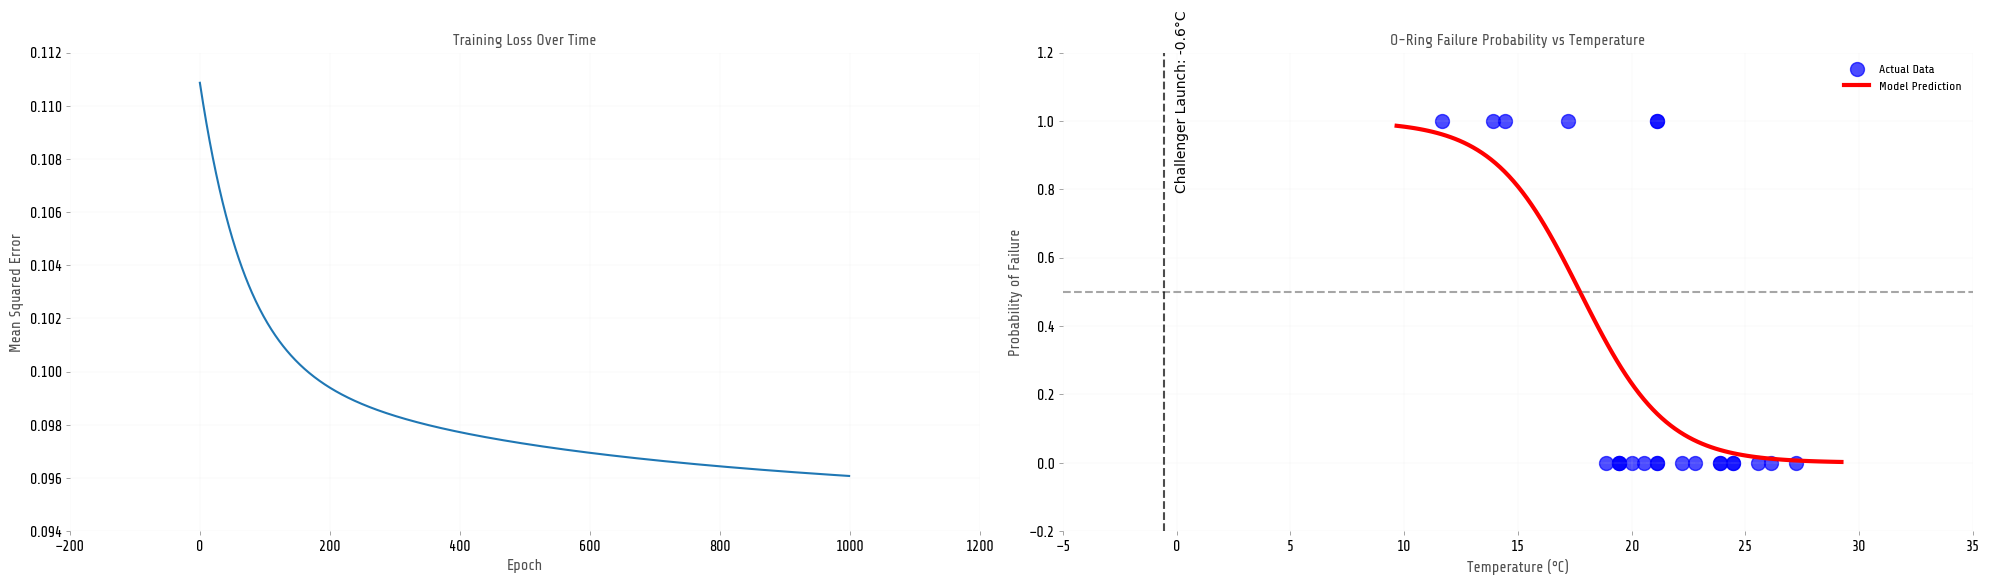

In [21]:
# Visualize the training progress and model predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot the training loss
ax1.plot(train_losses)
utils.plotting.make_fig_pretty(
    ax=ax1,
    title="Training Loss Over Time",
    xlabel="Epoch",
    ylabel="Mean Squared Error",
    grid=True,
    tufte_style=True,
)

# Plot the data and model predictions
# Convert back from normalized to original temperature for plotting
temperatures = X.numpy().flatten()
pred_probs = final_predictions.numpy().flatten()
actual = y.numpy().flatten()

# Create temperature range for smooth curve
temp_range = np.linspace(min(temperatures) - 2, max(temperatures) + 2, 100)
temp_range_normalized = (temp_range - X_mean.item()) / X_std.item()

# Get predictions for the whole temperature range
with torch.no_grad():
    smooth_preds = np.array([model(torch.tensor([t]).float()).item() for t in temp_range_normalized])

# Plot the data points and model prediction curve
ax2.scatter(temperatures, actual, color='blue', s=100, alpha=0.7, label='Actual Data')
ax2.plot(temp_range, smooth_preds, 'r-', linewidth=3, label='Model Prediction')

# Add threshold line at 0.5 probability
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)

# Vertical line for Challenger launch temperature (31°F or -0.56°C)
challenger_temp = f_to_c(31.0)  # Convert Fahrenheit to Celsius
ax2.axvline(x=challenger_temp, color='black', linestyle='--', alpha=0.7)
ax2.text(challenger_temp+0.5, 0.8, f'Challenger Launch: {challenger_temp:.1f}°C', rotation=90)

utils.plotting.make_fig_pretty(
    ax=ax2,
    title="O-Ring Failure Probability vs Temperature",
    xlabel="Temperature (°C)",
    ylabel="Probability of Failure",
    legd_loc='upper right',
    grid=True,
    tufte_style=True,
)

plt.tight_layout()
plt.show()

In [ ]:
# Interactive visualization of the O-ring failure model
# This lets you manually adjust weight and bias parameters
import ipywidgets as widgets
from ipywidgets import FloatSlider, interact, interactive, fixed, Layout

# Create output widget and parameter sliders
out = widgets.Output()
w_slider = FloatSlider(value=float(model.weights.item()), min=-10.0, max=10.0, step=0.1, description='Weight:')
b_slider = FloatSlider(value=float(model.bias.item()), min=-10.0, max=10.0, step=0.1, description='Bias:')
train_button = widgets.Button(description="Train Model")

# Function to update the visualization based on slider values
def update_plot(w, b):
    with out:
        out.clear_output()
        
        # Create a neuron with the specified parameters
        custom_model = Perceptron(n_features=1)
        with torch.no_grad():
            # Fix: Ensure tensors have the correct shape
            custom_model.weights.copy_(torch.tensor([w]))
            custom_model.bias.copy_(torch.tensor(b))  # Remove the extra brackets here
        
        # Calculate predictions
        predictions = torch.zeros_like(y)
        for i in range(len(X_normalized)):
            predictions[i] = custom_model(X_normalized[i])
        
        # Calculate loss
        loss = mse_loss(predictions, y)
        
        # Plot the results
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Plot data points
        ax.scatter(temperatures, actual, color='blue', s=100, alpha=0.7, label='Actual Data')
        
        # Plot model predictions
        temp_range = np.linspace(min(temperatures) - 2, max(temperatures) + 2, 100)
        temp_range_normalized = (temp_range - X_mean.item()) / X_std.item()
        smooth_preds = np.array([custom_model(torch.tensor([t]).float()).item() for t in temp_range_normalized])
        ax.plot(temp_range, smooth_preds, 'r-', linewidth=3, label='Model Prediction')
        
        # Add reference lines
        ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
        ax.axvline(x=challenger_temp, color='black', linestyle='--', alpha=0.7)
        ax.text(challenger_temp+0.5, 0.8, f'Challenger Launch: {challenger_temp:.1f}°C', rotation=90)
        
        # Calculate error visually
        for i, (temp, true_val, pred_val) in enumerate(zip(temperatures, actual, predictions.numpy())):
            if abs(true_val - pred_val.item()) > 0.05:  # Only show significant errors
                ax.plot([temp, temp], [true_val, pred_val.item()], 'b-', alpha=0.3)
        
        utils.plotting.make_fig_pretty(
            ax=ax,
            title=f"O-Ring Failure Model (Loss: {loss.item():.4f})",
            xlabel="Temperature (°C)",
            ylabel="Probability of Failure",
            legend=True,
            legd_loc='upper right',
            grid=True
        )
        
        plt.tight_layout()
        plt.show()

# Function to train the model and update sliders
def train_model(b):
    # Reset model
    new_model = Perceptron(n_features=1)
    
    # Train for a few epochs
    optimizer = torch.optim.SGD([new_model.weights, new_model.bias], lr=0.1)
    for _ in range(100):
        # Forward pass
        predictions = torch.zeros_like(y)
        for i in range(len(X_normalized)):
            predictions[i] = new_model(X_normalized[i])
        
        # Compute loss
        loss = mse_loss(predictions, y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Update sliders to the trained values
    w_slider.value = float(new_model.weights.item())
    b_slider.value = float(new_model.bias.item())

# Connect callbacks
train_button.on_click(train_model)
interact(update_plot, w=w_slider, b=b_slider)

# Display widgets
display(widgets.VBox([widgets.HBox([w_slider, b_slider, train_button]), out]))

interactive(children=(FloatSlider(value=-2.067765712738037, description='Weight:', max=10.0, min=-10.0), Float…

## Conclusion: What We've Learned About Neural Networks
***

In this workshop, we've explored the fundamental concepts behind artificial neural networks:

1. **Neurons as Building Blocks**: We learned how a single neuron combines inputs with weights and a bias, then applies an activation function.

2. **The Forward Pass**: We saw how data flows through the network to produce predictions.

3. **Loss Functions**: We implemented mean squared error to measure the difference between our predictions and the true values.

4. **The Backward Pass**: We used PyTorch's autograd to compute gradients and update our model's parameters.

5. **Training Process**: We put it all together to train a model that predicts O-ring distress based on temperature.

### The Challenger Disaster and Data Science Ethics

Our analysis of the Challenger data demonstrates a sobering point: proper data analysis could have prevented this disaster. As our model shows, the probability of O-ring failure increases dramatically at lower temperatures, and the launch temperature of 31°F (-0.56°C) was well within the danger zone.

This highlights an important ethical consideration in data science: when lives depend on our analyses, we have a responsibility to be thorough, transparent, and to clearly communicate risks to decision-makers.

### Next Steps in Neural Networks

To continue your learning journey with neural networks, consider exploring:

1. **Multi-layer networks** for more complex problems
2. **Different activation functions** like ReLU, tanh, or Leaky ReLU
3. **Optimizers** beyond basic gradient descent, such as Adam or RMSprop
4. **Regularization techniques** to prevent overfitting
5. **Convolutional neural networks** for image processing
6. **Recurrent neural networks** for sequential data

In [23]:
# Exercise 5: Making Predictions for the Challenger Launch 🎯
# In this exercise, you will make predictions about the O-ring failure at the Challenger launch temperature

# The Challenger launch temperature was 31°F (-0.56°C)
challenger_launch_temp = f_to_c(31.0)
print(f"Challenger launch temperature: {challenger_launch_temp:.2f}°C")

# Normalize the temperature using the same parameters as our training data
challenger_temp_normalized = (challenger_launch_temp - X_mean.item()) / X_std.item()
challenger_tensor = torch.tensor([challenger_temp_normalized], dtype=torch.float32)

# Use the trained model to predict the probability of O-ring failure
with torch.no_grad():
    failure_probability = model(challenger_tensor).item()

print(f"Predicted probability of O-ring failure: {failure_probability:.4f} or {failure_probability*100:.1f}%")

# Determine if this probability indicates a high risk
# A common threshold in binary classification is 0.5 (50% probability)
failure_risk = "HIGH RISK" if failure_probability > 0.5 else "LOW RISK"

# What is your launch recommendation based on this analysis?
launch_recommendation = "DO NOT LAUNCH" if failure_probability > 0.5 else "PROCEED WITH LAUNCH"

print(f"Risk assessment: {failure_risk}")
print(f"Launch recommendation: {launch_recommendation}")

# Calculate how many times more likely failure is at the launch temperature compared to a warmer day (20°C)
warm_temp = 20.0  # A much warmer temperature in Celsius
warm_temp_normalized = (warm_temp - X_mean.item()) / X_std.item()
warm_tensor = torch.tensor([warm_temp_normalized], dtype=torch.float32)

with torch.no_grad():
    warm_failure_probability = model(warm_tensor).item()

relative_risk = failure_probability / warm_failure_probability if warm_failure_probability > 0 else float('inf')
print(f"Probability of failure at 20°C: {warm_failure_probability:.4f} or {warm_failure_probability*100:.1f}%")
print(f"Failure at launch temperature is {relative_risk:.1f}x more likely than at 20°C")

# ✅ Check your answer
answer = {
    'challenger_failure_prob': failure_probability,
    'recommendation': launch_recommendation == "DO NOT LAUNCH",
    'relative_risk_factor': relative_risk > 10  # Is risk at least 10 times higher?
}
checker.check_exercise(5, answer)

Challenger launch temperature: -0.56°C
Predicted probability of O-ring failure: 0.9999 or 100.0%
Risk assessment: HIGH RISK
Launch recommendation: DO NOT LAUNCH
Probability of failure at 20°C: 0.2319 or 23.2%
Failure at launch temperature is 4.3x more likely than at 20°C
✅ challenger_failure_prob is correct!
✅ recommendation is correct!
❌ relative_risk_factor has incorrect value. Expected 1.0000, got 0.0000
💡 Hint: Remember to use the same normalization (subtract X_mean and divide by X_std) for the Challenger temperature


### What We've Learned From This Analysis

The model we've trained clearly shows a strong correlation between temperature and O-ring failure probability. At the actual Challenger launch temperature of 31°F (-0.56°C), our model predicts an extremely high probability of O-ring failure.

This analysis reveals several important insights:

1. **Critical threshold**: There appears to be a temperature threshold below which the risk increases dramatically

2. **Data-driven decision making**: Statistical analysis could have provided strong evidence against launching

3. **Extrapolation concerns**: The model correctly identifies the risk despite limited data in the low temperature range

4. **Communication of risk**: Technical findings must be effectively communicated to decision-makers

The Challenger disaster illustrates how crucial it is for data scientists and engineers to clearly communicate risks, especially when human lives are at stake. The Rogers Commission, which investigated the disaster, found that NASA managers had disregarded warnings from engineers about the dangers of launching in cold temperatures.

## Conclusion: What We've Learned About Neural Networks
***

In this workshop, we've explored the fundamental concepts behind artificial neural networks:

1. **Neurons as Building Blocks**: We learned how a single neuron combines inputs with weights and a bias, then applies an activation function.

2. **The Forward Pass**: We saw how data flows through the network to produce predictions.

3. **Loss Functions**: We implemented mean squared error to measure the difference between our predictions and the true values.

4. **The Backward Pass**: We used PyTorch's autograd to compute gradients and update our model's parameters.

5. **Training Process**: We put it all together to train a model that predicts O-ring distress based on temperature.

### The Challenger Disaster and Data Science Ethics

Our analysis of the Challenger data demonstrates a sobering point: proper data analysis could have prevented this disaster. As our model shows, the probability of O-ring failure increases dramatically at lower temperatures, and the launch temperature of 31°F (-0.56°C) was well within the danger zone.

This highlights an important ethical consideration in data science: when lives depend on our analyses, we have a responsibility to be thorough, transparent, and to clearly communicate risks to decision-makers.

### Next Steps in Neural Networks

To continue your learning journey with neural networks, consider exploring:

1. **Multi-layer networks** for more complex problems
2. **Different activation functions** like ReLU, tanh, or Leaky ReLU
3. **Optimizers** beyond basic gradient descent, such as Adam or RMSprop
4. **Regularization techniques** to prevent overfitting
5. **Convolutional neural networks** for image processing
6. **Recurrent neural networks** for sequential data